In [38]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [39]:
#data collection and processing
dataset = pd.read_csv("/content/silver_price_data.csv")

In [40]:
# first five rows in the DataFrame
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [41]:
# last five rows in the DataFrame
dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [42]:
#finding a shape of the dataset
dataset.shape

(2290, 6)

In [43]:
#getting some  basic info about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [44]:
#checking the missing value in the dataset
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [45]:
# getting the satistical measures of the dataset
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [46]:
# getting the correlation between the columns 
correlation = dataset.corr()

<AxesSubplot:>

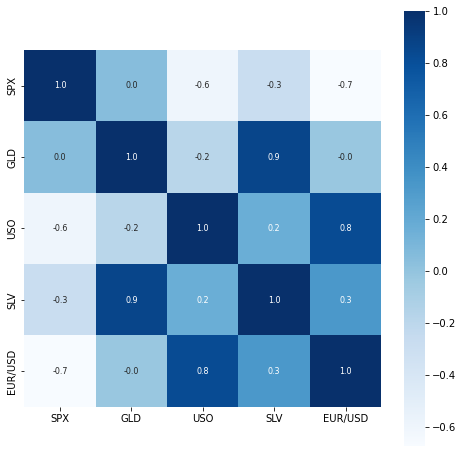

In [47]:
# constructing the heatmap to understand the correlation 
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar = True , square = True ,fmt = '.1f', annot = True , annot_kws ={'size':8}, cmap='Blues')

In [48]:
# correlatioin values of SLV
print(correlation['SLV'])

SPX       -0.274055
GLD        0.866632
USO        0.167547
SLV        1.000000
EUR/USD    0.321631
Name: SLV, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SLV', ylabel='Density'>

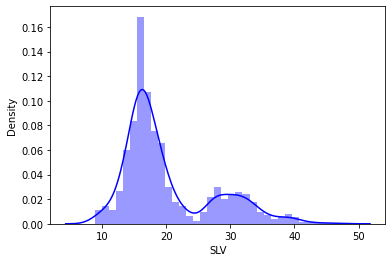

In [49]:
# checking the distribution of the SLV Price
sns.distplot(dataset['SLV'], color = 'blue')

In [50]:
#splitting the features and target
X = dataset.drop(['Date','SLV'],axis =1)
y = dataset['SLV']


In [51]:
print(X)

              SPX         GLD        USO   EUR/USD
0     1447.160034   84.860001  78.470001  1.471692
1     1447.160034   85.570000  78.370003  1.474491
2     1411.630005   85.129997  77.309998  1.475492
3     1416.180054   84.769997  75.500000  1.468299
4     1390.189941   86.779999  76.059998  1.557099
...           ...         ...        ...       ...
2285  2671.919922  124.589996  14.060000  1.186789
2286  2697.790039  124.330002  14.370000  1.184722
2287  2723.070068  125.180000  14.410000  1.191753
2288  2730.129883  124.489998  14.380000  1.193118
2289  2725.780029  122.543800  14.405800  1.182033

[2290 rows x 4 columns]


In [52]:
print(y)

0       15.1800
1       15.2850
2       15.1670
3       15.0530
4       15.5900
         ...   
2285    15.5100
2286    15.5300
2287    15.7400
2288    15.5600
2289    15.4542
Name: SLV, Length: 2290, dtype: float64


In [53]:
#splitting trainig and test data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2 ,random_state = 42)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1832, 4)
(458, 4)
(1832,)
(458,)


In [55]:
# model training : Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [56]:
regressor = RandomForestRegressor(n_estimators=100)

In [57]:
regressor.fit(X_train , y_train)

RandomForestRegressor()

In [58]:
#model evaluation 
# prediction 
test_prediction = regressor.predict(X_test)
print(test_prediction)

[15.95324198 21.15099977 20.84519965 19.78811055 16.96870017 15.93559994
 16.04310023 16.87699972 14.0037     16.25281975 14.1913     32.20189975
 28.27870039 17.32019995 32.70360017 11.2848     19.07579987 15.2203
 15.36000002 24.44280008 18.97290002 15.66379999 17.52150026 15.91250002
 14.2987     15.5531     15.50344197 15.64339985 18.16559996 20.62739965
 45.24780039 16.83969036 32.33499972 16.11080045 14.53219999 16.30799954
 23.01440021 30.34210009 35.4250011  27.21940038 16.70290003 15.8015
 16.00249996 15.4258     16.05159984 14.013      12.6498     15.5884
 20.76210024 15.65910015 17.02999964 20.71819983 16.68778021 30.47469995
 21.1560998  18.73269968 34.13809985 22.24149976 15.2033     16.31380043
 18.53586044 16.3130106  14.0639     15.7109     11.8585     16.17440009
 15.2206     15.37179999 31.43779993 13.1315     10.4404     29.22440004
 29.31359991 17.29625054 28.59280014 17.22069992 19.48060056 20.05969975
 15.228      17.91420032 22.62669998 14.2277     14.4924     18

In [59]:
# getting r2_score 
from sklearn import metrics

In [60]:
error_score = metrics.r2_score(y_test , test_prediction)
print("R squared error :" , error_score)

R squared error : 0.990862714394318


In [61]:
#compare the actual values and predicted value in plot
y_test = list(y_test)

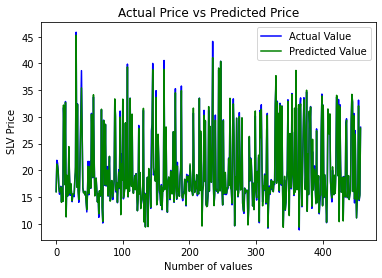

In [62]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('SLV Price')
plt.legend()
plt.show()